In [2]:
!pip install mysql-connector-python

In [3]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1234Princess!"
)

print(mydb)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from mysql.connector import connect

conn = connect(option_files = 'connectors.cnf')
cursor = conn.cursor()

query = "SELECT c.name AS category, COUNT(fc.film_id) AS num_films FROM film_category fc, category c WHERE fc.category_id = c.category_id GROUP BY c.name ORDER BY num_films DESC;"
cursor.execute(query)
result = cursor.fetchall()
cat_counts = pd.DataFrame(result)
cat_counts.head()

,0,1
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66


<AxesSubplot:xlabel='1', ylabel='0'>

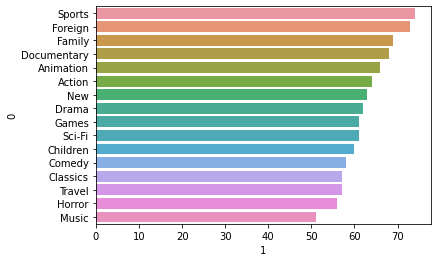

In [6]:
sns.barplot(x=cat_counts[1], y=cat_counts[0], orient='h')

<AxesSubplot:xlabel='1', ylabel='0'>

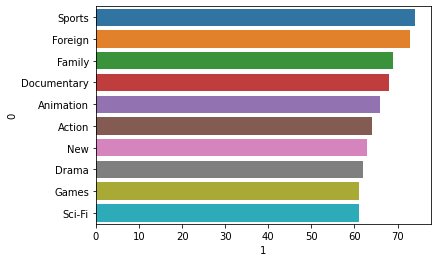

In [7]:
sns.barplot(x=cat_counts[1].head(10), y=cat_counts[0].head(10), orient='h')

In [8]:

query = "SELECT co.country, COUNT(ci.city_id) AS num_cities FROM city ci, country co WHERE ci.country_id = co.country_id GROUP BY co.country ORDER BY num_cities DESC;"
cursor.execute(query)
result = cursor.fetchall()
city_counts = pd.DataFrame(result)
city_counts.head()

,0,1
0,India,60
1,China,53
2,United States,35
3,Japan,31
4,Mexico,30


In [9]:
query = ""
cursor.execute(query)
result = cursor.fetchall()
_counts = pd.DataFrame(result)
_counts.head()

""


<AxesSubplot:xlabel='1', ylabel='0'>

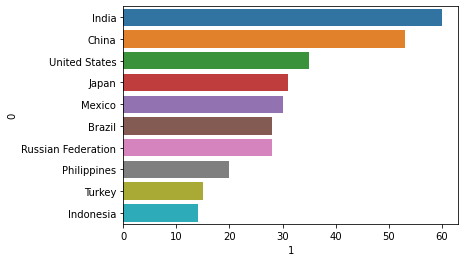

In [10]:
sns.barplot(x=city_counts[1].head(10), y=city_counts[0].head(10), orient='h')

In [12]:
query = "SELECT f.title, SUM(fa.actor_id) as num_actors FROM film f, film_actor fa WHERE f.film_id = fa.film_id GROUP BY f.title ORDER BY num_actors DESC;"
cursor.execute(query)
result = cursor.fetchall()
actor_counts = pd.DataFrame(result)
actor_counts.head()

,0,1
0,CRAZY HOME,1688
1,TITANIC BOONDOCK,1555
2,SKY MIRACLE,1451
3,LAMBS CINCINATTI,1431
4,CHITTY LOCK,1417


<AxesSubplot:xlabel='1', ylabel='0'>

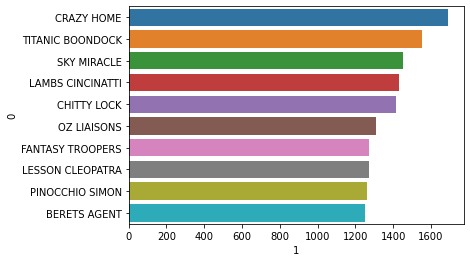

In [13]:
sns.barplot(x=actor_counts[1].head(10), y=actor_counts[0].head(10), orient='h')

In [14]:
query = "SELECT COUNT(r.rental_id) AS num_rentals, SUM(p.amount) AS total_spent, co.country FROM rental r JOIN customer cu ON cu.customer_id = r.customer_id JOIN payment p ON cu.customer_id = p.customer_id JOIN address a ON cu.address_id = a.address_id JOIN city ci ON a.city_id = ci.city_id JOIN country co ON ci.country_id = co.country_id GROUP BY co.country ORDER BY num_rentals DESC;"
cursor.execute(query)
result = cursor.fetchall()
rental_counts = pd.DataFrame(result)
rental_counts.head()

,0,1,2
0,42786,180773.14,India
1,39969,162069.31,China
2,26942,115330.58,United States
3,22570,94337.30,Japan
4,21662,90186.38,Mexico


<AxesSubplot:xlabel='0', ylabel='2'>

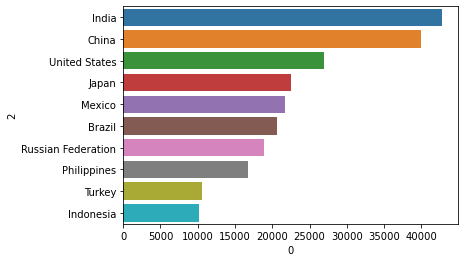

In [15]:
sns.barplot(x=rental_counts[0].head(10), y=rental_counts[2].head(10), orient='h')

In [16]:
query = "SELECT COUNT(r.rental_id) AS num_rentals, SUM(p.amount) AS total_spent, co.country FROM rental r JOIN customer cu ON cu.customer_id = r.customer_id JOIN payment p ON cu.customer_id = p.customer_id JOIN address a ON cu.address_id = a.address_id JOIN city ci ON a.city_id = ci.city_id JOIN country co ON ci.country_id = co.country_id GROUP BY co.country ORDER BY total_spent DESC;"
cursor.execute(query)
result = cursor.fetchall()
sales_counts = pd.DataFrame(result)
sales_counts.head()

,0,1,2
0,42786,180773.14,India
1,39969,162069.31,China
2,26942,115330.58,United States
3,22570,94337.30,Japan
4,21662,90186.38,Mexico


<AxesSubplot:xlabel='1', ylabel='2'>

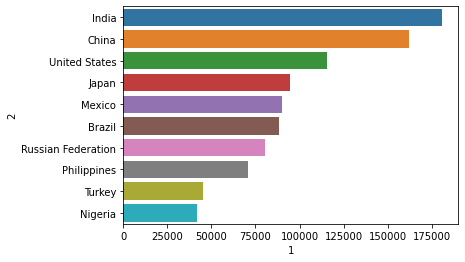

In [17]:
sns.barplot(x=sales_counts[1].head(10), y=sales_counts[2].head(10), orient='h')

In [18]:
plt.scatter(x=sales_counts[1], y=x=sales_counts[1])

SyntaxError: invalid syntax (<ipython-input-18-5bc3caba3cc1>, line 1)

In [ ]:
SELECT COUNT(rental.rental_id) as "Number of Rentals", SUM(payment.amount) as "Money Spent" FROM rental JOIN payment on payment.customer_id = rental.customer_id GROUP BY rental.customer_id;

In [20]:
query = "SELECT COUNT(rental.rental_id) as 'Number of Rentals', SUM(payment.amount) as 'Money Spent' FROM rental JOIN payment on payment.customer_id = rental.customer_id GROUP BY rental.customer_id;"
cursor.execute(query)
result = cursor.fetchall()
sales_counts = pd.DataFrame(result)
sales_counts.head()

,0,1
0,1024,3797.76
1,729,3475.71
2,676,3529.24
3,484,1799.16
4,1444,5495.56


In [30]:
sales_counts.to_csv("Sales_Count.csv")

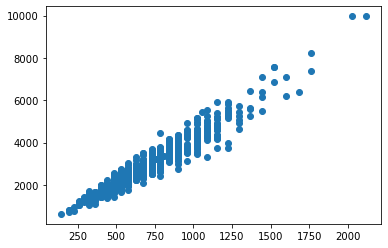

In [22]:
plt.scatter(x=sales_counts[0], y=sales_counts[1])